In [43]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from osgeo import gdal
import seaborn as sns
import warnings



### To extract paramteres required from metadata of NEON data

In [44]:
import h5py

### add your .h5 files in NIWO_neon_image and extract parameters from below function
def open_neon(NIWO_neon_image, no_data=-9999):
    """ 
    Function: open_neon
    Purpose: To open a NEON (National Ecological Observatory Network) HDF5 file, extract various types of data including reflectance data, ancillary data, sensor angles, and solar angles.
    Inputs:
      - NIWO_neon_image: File path of the NEON HDF5 file.
      - no_data: Value to represent 'no data'; default is -9999.
    Outputs: 
      - hdf_obj: HDF5 file object.
      - ancillary_data: Dictionary containing various ancillary data fields.
      - to_sensor_azimuth: Array of sensor azimuth angles.
      - to_sensor_zenith: Array of sensor zenith angles.
      - solar_azimuth_angles: List of solar azimuth angles.
      - solar_zenith_angles: List of solar zenith angles.
      - reflectance_data: Array of reflectance data.
      - wavelengths: Array of wavelengths corresponding to the reflectance data. 
    """


    hdf_obj = h5py.File(NIWO_neon_image, 'r')

    base_key = list(hdf_obj.keys())[0]
    metadata = hdf_obj[base_key]["Reflectance"]["Metadata"]
    data = hdf_obj[base_key]["Reflectance"]["Reflectance_Data"]
    wavelengths = hdf_obj[base_key]["Reflectance"]["Metadata"]["Spectral_Data"]["Wavelength"][:]

    # ancillary_fields
    ancillary_fields = ["Aerosol_Optical_Depth", "Aspect", "Cast_Shadow", "Dark_Dense_Vegetation_Classification",
                        "Data_Selection_Index", "Haze_Cloud_Water_Map", "Illumination_Factor", "Path_Length",
                        "Sky_View_Factor", "Slope", "Smooth_Surface_Elevation", "Visibility_Index_Map",
                        "Water_Vapor_Column"]

    ancillary_data = {}
    for field in ancillary_fields:
        if field in metadata["Ancillary_Imagery"]:
            ancillary_data[field] = metadata["Ancillary_Imagery"][field][()]

    # sensor azimuth and zenith angles
    to_sensor_azimuth = metadata["to-sensor_azimuth_angle"][()]
    to_sensor_zenith = metadata["to-sensor_zenith_angle"][()]

    # sun angles
    logs = metadata['Logs']
    solar_azimuth_angles = []
    solar_zenith_angles = []

    for key in logs.keys():
        subgroup = logs[key]
        for subgroup_key in subgroup.keys():
            # Check if the subgroup key is 'Solar_Azimuth_Angle'
            if subgroup_key == 'Solar_Azimuth_Angle':
                solar_azimuth_angle = subgroup[subgroup_key][()]
                solar_azimuth_angles.append(solar_azimuth_angle)

            # Check if the subgroup key is 'Solar_Zenith_Angle'
            if subgroup_key == 'Solar_Zenith_Angle':
                solar_zenith_angle = subgroup[subgroup_key][()]
                solar_zenith_angles.append(solar_zenith_angle)

    reflectance_data = data[()]

    return hdf_obj, ancillary_data, to_sensor_azimuth, to_sensor_zenith, solar_azimuth_angles, solar_zenith_angles, reflectance_data, wavelengths 

def get_neon_parameters(NIWO_neon_image):
    hdf_obj, ancillary_data, to_sensor_azimuth, to_sensor_zenith, solar_azimuth_angles, solar_zenith_angles, reflectance_data, wavelengths = open_neon(NIWO_neon_image)
    
    azimuth_angles = solar_azimuth_angles
    zenith_angles = solar_zenith_angles
    wavelengths = wavelengths
    
    average_azimuth = sum(azimuth_angles) / len(azimuth_angles)
    average_zenith = sum(zenith_angles) / len(zenith_angles)

    illumination = ancillary_data.get("Illumination_Factor", None)
    slope = ancillary_data.get("Slope", None)
    aspect = ancillary_data.get("Aspect", None)
    
    return average_azimuth, average_zenith, illumination, slope, aspect, reflectance_data, wavelengths

NIWO_neon_image = r'C:\Users\JANUSHI SHASTRI\Desktop\CIRES_PROJECT\NEON.D13.NIWO.DP3.30006.001.2018-08.basic.20230612T173104Z.RELEASE-2023\NEON_D13_NIWO_DP3_449000_4435000_reflectance.h5'
average_azimuth, average_zenith, illumination, slope, aspect, reflectance_data, wavelengths = get_neon_parameters(NIWO_neon_image)

print("Average Solar Azimuth Angle:", average_azimuth)
print("Average Solar Zenith Angle:", average_zenith)
print("Illumination Factor:", illumination)
print("Slope:", slope)
print("Aspect:", aspect)
print("Reflectance Data:", reflectance_data)


Average Solar Azimuth Angle: 108.76427917480468
Average Solar Zenith Angle: 42.07432632446289
Illumination Factor: [[81 82 86 ... 52 50 51]
 [82 82 86 ... 52 50 51]
 [81 82 85 ... 52 50 50]
 ...
 [65 65 64 ... 66 66 66]
 [65 65 64 ... 66 66 66]
 [65 65 64 ... 66 66 66]]
Slope: [[11.611702  11.531953  12.442795  ... 15.522491  16.155117  15.51187  ]
 [14.647534  14.407147  14.700035  ... 15.803514  16.54182   16.057512 ]
 [15.262839  15.082373  15.327489  ... 16.336166  17.11085   16.743814 ]
 ...
 [15.909962  15.996335  16.22447   ...  6.5027742  6.4771185  6.4538198]
 [15.700378  15.764792  15.949019  ...  6.5537324  6.52736    6.5038986]
 [15.64266   15.678238  15.817171  ...  6.6203976  6.626473   6.6117334]]
Aspect: [[176.40102 171.17825 151.57759 ... 313.74753 310.57947 312.47485]
 [177.66232 174.29121 158.99567 ... 316.45627 312.64594 314.2726 ]
 [178.25679 175.77448 162.49577 ... 320.08545 315.53015 316.6222 ]
 ...
 [348.59705 348.42212 346.8907  ... 345.99353 345.80936 345.5438

In [45]:
reflectance= reflectance_data
reflectance.shape

(1000, 1000, 426)

### Topographic Correction using SCS+C method

In [46]:
def topographic_correction(reflectance, slope, solar_zenith, average_azimuth):

    """
    Applies a topographic correction to multispectral reflectance data.

    - reflectance: A 3D numpy array of reflectance data.
    - slope: A 2D array or scalar representing the slope of the terrain.
    - solar_zenith: The solar zenith angle in degrees.
    - average_azimuth: The average azimuth angle in degrees.

    Topographic correction is used to minimize the effects of terrain illumination differences in reflectance data. 
    This is particularly relevant in mountainous regions where illumination varies significantly with terrain orientation.

    The function performs the following steps:
    1. Converts the slope, solar zenith, and relative azimuth angles from degrees to radians.
    2. Calculates the cosine of the incident angle (cos_i) to estimate terrain illumination.
    3. Flattens the arrays for cos_i and reflectance for linear regression.
    4. Iterates over each spectral band and applies a linear regression between cos_i and reflectance.
    5. Calculates a correction coefficient (C) for each band.
    6. Applies the topographic correction using C and returns the corrected reflectance, C coefficients, and cos_i values.

    The result is a reflectance dataset corrected for topographic effects, enhancing the reliability of data analysis in varied terrain.
    """
    # Convert angles to radians
    relative_azimuth = aspect - average_azimuth
    slope_rad = np.radians(slope)
    solar_zenith_rad = np.radians(solar_zenith)
    relative_azimuth_rad = np.radians(relative_azimuth)

    # Calculate illumination factor
    cos_i = np.cos(solar_zenith_rad) * np.cos(slope_rad) + np.sin(solar_zenith_rad) * np.sin(slope_rad) * np.cos(relative_azimuth_rad)

    # Reshape the arrays
    cos_i_flat = cos_i.flatten()
    reflectance_flat = reflectance.reshape(-1, reflectance.shape[-1])

    # Initialize arrays for corrected reflectance and C coefficients
    corrected_reflectance = np.empty(reflectance.shape)
    C = np.empty(reflectance.shape[-1])

    # Apply topographic correction to each band
    for i in range(reflectance.shape[-1]):
        # Calculate linear regression parameters for the current band
        with warnings.catch_warnings():
            warnings.simplefilter('ignore', np.RankWarning)
            b, a = np.polyfit(cos_i_flat, reflectance_flat[:, i], deg=1)

            # Calculate the C coefficient for the current band
            C[i] = a / b

            # Apply topographic correction to the current band
            corrected_reflectance[..., i] = (reflectance[..., i] * (np.cos(np.radians(solar_zenith)) * np.cos(np.radians(slope)) + C[i])) / (cos_i + C[i])

    return corrected_reflectance, C, cos_i

corrected_reflectance, C, cos_i = topographic_correction(reflectance, slope, average_zenith, average_azimuth)


### Plotting different graphs for topographic correction 

In [47]:
def plot_reflectance(image, corrected_image, r=0, g=1, b=2, percentiles=(5, 95)):
    """
    Plots the original and corrected reflectance images for visual comparison.

    - image: A 3D numpy array of the original reflectance image.
    - corrected_image: A 3D numpy array of the corrected reflectance image after applying a specific correction algorithm.
    - r, g, b: Indices of the bands to be used for the red, green, and blue channels for visualization. Defaults are 0, 1, 2.
    - percentiles: A tuple (lower, upper) specifying the percentiles to clip the reflectance values for better visualization. Defaults to (5, 95).

    The function performs the following steps:
    1. Extracts and converts the specified bands (RGB) from both original and corrected images to float.
    2. Applies percentile-based clipping to both sets of RGB data to enhance contrast and visibility.
    3. Normalizes the RGB values to the 0-1 range for proper display.
    4. Plots both the original and corrected images side by side for easy visual comparison.
    5. Adds titles, labels, and adjusts the layout for clear presentation.

    This visualization is helpful for assessing the effectiveness of the correction process, allowing for a direct visual comparison between the original and corrected imagery.
    """
    # Plot original reflectance
    rgb_original = image[:, :, [r, g, b]].astype(float)
    bottom = np.percentile(rgb_original, percentiles[0], axis=(0, 1))
    top = np.percentile(rgb_original, percentiles[1], axis=(0, 1))
    rgb_original = np.clip(rgb_original, bottom, top)
    rgb_original = (rgb_original - np.min(rgb_original, axis=(0, 1))) / (np.max(rgb_original, axis=(0, 1)) - np.min(rgb_original, axis=(0, 1)))

    # Plot corrected reflectance
    rgb_corrected = corrected_image[:, :, [r, g, b]].astype(float)
    bottom = np.percentile(rgb_corrected, percentiles[0], axis=(0, 1))
    top = np.percentile(rgb_corrected, percentiles[1], axis=(0, 1))
    rgb_corrected = np.clip(rgb_corrected, bottom, top)
    rgb_corrected = (rgb_corrected - np.min(rgb_corrected, axis=(0, 1))) / (np.max(rgb_corrected, axis=(0, 1)) - np.min(rgb_corrected, axis=(0, 1)))

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original reflectance
    axes[0].imshow(rgb_original)
    axes[0].set_title('Original Reflectance')
    axes[0].set_xlabel('Column')
    axes[0].set_ylabel('Row')

    # Plot corrected reflectance
    axes[1].imshow(rgb_corrected)
    axes[1].set_title('Corrected Reflectance using scs (solar angles)')
    axes[1].set_xlabel('Column')
    axes[1].set_ylabel('Row')

    plt.tight_layout()
    plt.show()
    plt.close()

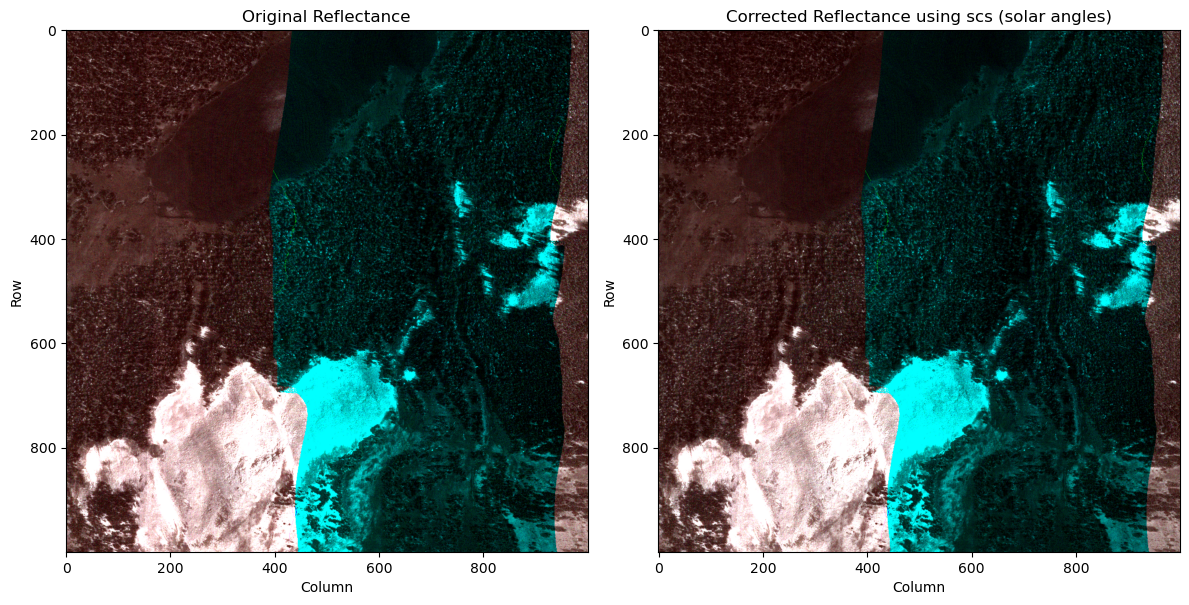

In [48]:

# Set the indices for the RGB bands
r_index = 0  # Red band index
g_index = 1  # Green band index
b_index = 2  # Blue band index

# Set the percentiles for contrast enhancement
percentiles = (5, 95)

plot_reflectance(reflectance, corrected_reflectance, r=r_index, g=g_index, b=b_index, percentiles=percentiles)


In [7]:
corrected_reflectance

array([[[ 216.83303833,  278.50997925,  290.07440186, ...,
          258.27224731,  229.36116028,  255.38113403],
        [ 117.64431763,  173.11888123,  177.90116882, ...,
           86.08120728,   63.1262207 ,  160.68492126],
        [ 102.05355072,  163.28569031,  154.00810242, ...,
           66.7986908 ,   48.24349976,   74.22077179],
        ...,
        [ 148.92362976,  254.64802551,  248.96389771, ...,
          113.68215942,  154.60772705,  252.37437439],
        [ 228.30921936,  198.47988892,  252.40216064, ...,
           98.66629791,  206.51086426,   40.15488815],
        [ 195.78512573,  259.52911377,  221.96568298, ...,
           86.50970459,  200.33827209,   88.78627777]],

       [[ 194.24502563,  330.12088013,  308.11282349, ...,
          536.80523682,  453.55734253,  448.77301025],
        [ 193.14952087,  254.99542236,  281.63674927, ...,
          361.56069946,  360.60919189,  386.29904175],
        [ 169.38591003,  237.88075256,  209.18696594, ...,
          211.

#### visualizing for band 93 (NIR)

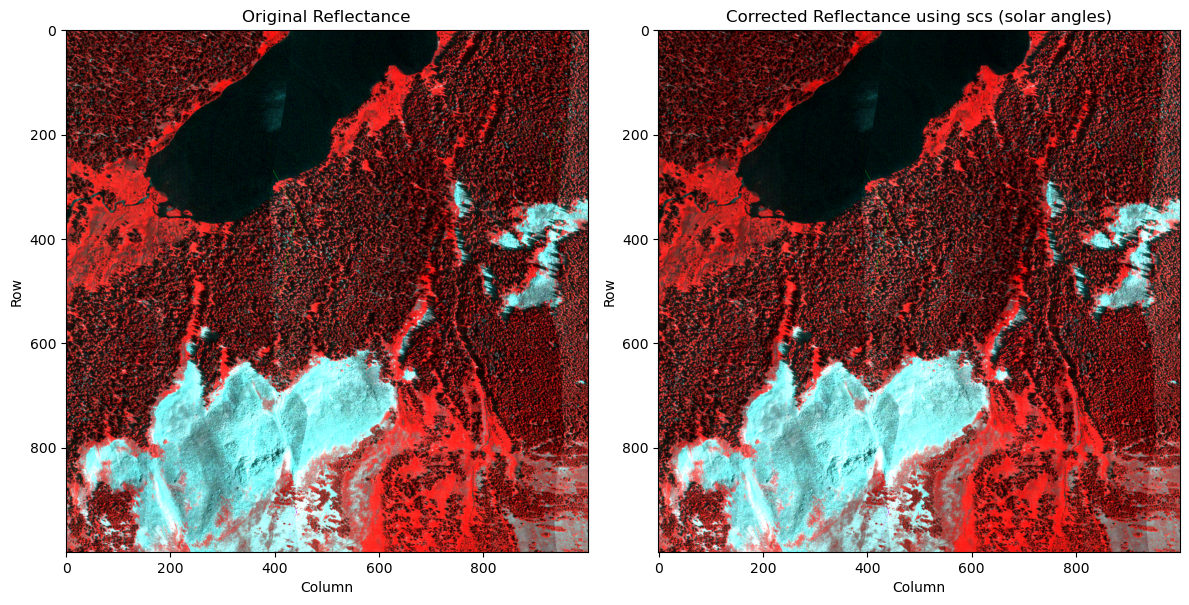

In [49]:
band_index = 93  

plot_reflectance(reflectance, corrected_reflectance, band_index, percentiles=percentiles)


Correlation coefficient: 0.9897809003169002


c:\Users\JANUSHI SHASTRI\anaconda3\envs\cires-demo\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


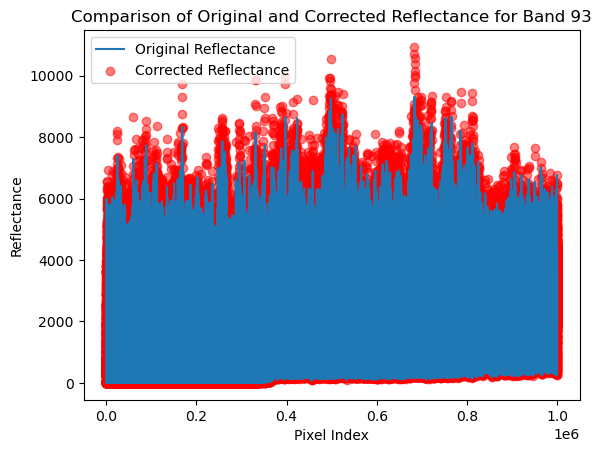

In [50]:

def plot_reflectance_comparison(reflectance, corrected_reflectance, band_index):

    """
        Plots a comparison between original and corrected reflectance values for a specific spectral band.

        - reflectance: A 3D numpy array of the original reflectance data.
        - corrected_reflectance: A 3D numpy array of the corrected reflectance data after applying a specific correction algorithm.
        - band_index: The index of the spectral band to be compared.

        The function performs the following steps:
        1. Extracts the reflectance values for the specified band from both the original and corrected datasets and flattens them into 1D arrays.
        2. Creates a plot showing both the original and corrected reflectance values for the specified band.
        3. Uses a line plot for the original reflectance and a scatter plot for the corrected reflectance for visual distinction.
        4. Adds labels, title, and legend to the plot for clarity.
        5. Calculates and prints the correlation coefficient between the original and corrected reflectance values.

        This comparison is useful for analyzing the effect of the correction process on specific spectral bands and
        quantitatively evaluating the degree of correlation between original and corrected reflectance values.
    """
    reflectance_band = reflectance[:, :, band_index].flatten()
    corrected_reflectance_band = corrected_reflectance[:, :, band_index].flatten()

    fig, ax = plt.subplots()

    ax.plot(reflectance_band, label='Original Reflectance')

    ax.scatter(range(len(corrected_reflectance_band)), corrected_reflectance_band, label='Corrected Reflectance', color='red', alpha=0.5)

    ax.set_xlabel('Pixel Index')
    ax.set_ylabel('Reflectance')
    ax.set_title(f'Comparison of Original and Corrected Reflectance for Band {band_index}')

    ax.legend()

    # Calculate correlation coefficient
    correlation = np.corrcoef(reflectance_band, corrected_reflectance_band)[0, 1]

    print("Correlation coefficient:", correlation)

    plt.show()


band_index = 93  
plot_reflectance_comparison(reflectance, corrected_reflectance, band_index)


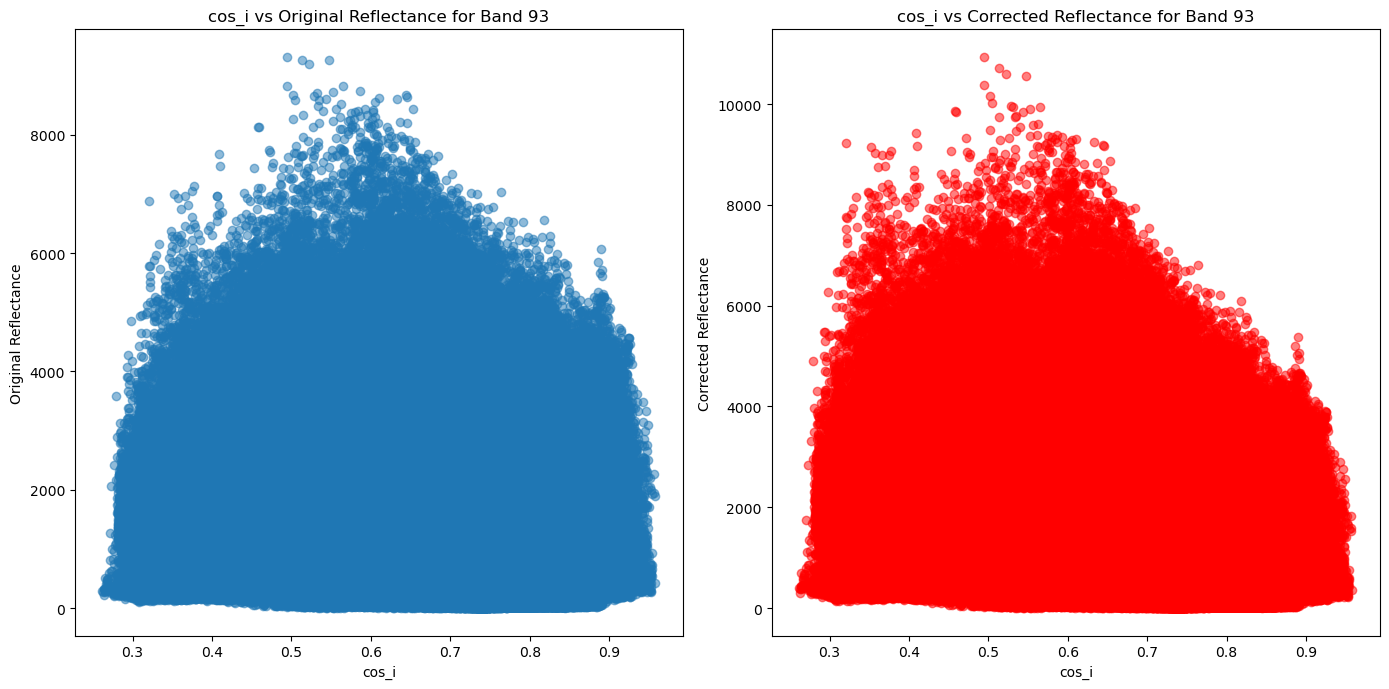

In [9]:
def plot_cos_i_vs_reflectance(cos_i, reflectance, corrected_reflectance, band_index):
    """
    Plots the relationship between the cosine of the incident angle (cos_i) and both original and corrected reflectance for a specific spectral band.

    - cos_i: A 2D numpy array representing the cosine of the incident illumination angle across the terrain.
    - reflectance: A 3D numpy array of the original reflectance data.
    - corrected_reflectance: A 3D numpy array of the corrected reflectance data.
    - band_index: The index of the spectral band to be analyzed.

    The function performs the following steps:
    1. Flattens the cos_i array and the reflectance data for the specified band into 1D arrays.
    2. Creates a subplot with two panels for visual comparison.
    3. Plots scatter plots showing the relationship between cos_i values and the original/corrected reflectance values.
    4. Adds labels, titles, and adjusts layout for clear visualization.

    This plot is useful for assessing how illumination angles influence reflectance values and how this relationship changes after applying reflectance corrections, providing insights into the effectiveness of the correction method.
    """
    # Flatten the inputs
    cos_i_flat = cos_i.flatten()
    reflectance_band = reflectance[:, :, band_index].flatten()
    corrected_reflectance_band = corrected_reflectance[:, :, band_index].flatten()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Plot cos_i vs. original reflectance values as a scatter plot
    ax[0].scatter(cos_i_flat, reflectance_band, alpha=0.5)
    ax[0].set_xlabel('cos_i')
    ax[0].set_ylabel('Original Reflectance')
    ax[0].set_title(f'cos_i vs Original Reflectance for Band {band_index}')

    # Plot cos_i vs. corrected reflectance values as a scatter plot
    ax[1].scatter(cos_i_flat, corrected_reflectance_band, color='red', alpha=0.5)
    ax[1].set_xlabel('cos_i')
    ax[1].set_ylabel('Corrected Reflectance')
    ax[1].set_title(f'cos_i vs Corrected Reflectance for Band {band_index}')

    # Show the plots
    plt.tight_layout()
    plt.show()


band_index = 93  # Band index to compare

plot_cos_i_vs_reflectance(cos_i, reflectance, corrected_reflectance, band_index)


### Function to plot aspect, illumination with reflectance and corrected reflectance

In [51]:
def plot_relationship_with_reflectance(parameter, param_name, reflectance, corrected_reflectance, band_index):

    """
    Plots the relationship between a given terrain parameter and both the original and corrected reflectance for a specific spectral band.

    - parameter: A 2D numpy array of a terrain or environmental parameter (e.g., slope, moisture).
    - param_name: The name of the parameter, used for labeling the plot.
    - reflectance: A 3D numpy array of the original reflectance data.
    - corrected_reflectance: A 3D numpy array of the corrected reflectance data.
    - band_index: The index of the spectral band for which the relationship is to be analyzed.

    The function performs the following steps:
    1. Flattens the parameter array and the reflectance data for the specified band into 1D arrays.
    2. Creates a subplot with two panels for visual comparison.
    3. Plots scatter plots showing the relationship between the parameter values and the original/corrected reflectance values.
    4. Adds a linear regression line to each plot to show the trend.
    5. Calculates and displays the correlation coefficient for each relationship.
    6. Adds labels, titles, and adjusts layout for clear visualization.

    This analysis is useful for understanding how the specified parameter correlates with reflectance values and 
    how this relationship is altered by the correction applied to the reflectance data.
    """
    
    # Flatten the inputs
    param_flat = parameter.flatten()
    reflectance_band = reflectance[:, :, band_index].flatten()
    corrected_reflectance_band = corrected_reflectance[:, :, band_index].flatten()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

    # Calculate padding for y-axis
    reflectance_padding = 0.05 * (np.max(reflectance_band) - np.min(reflectance_band))
    corrected_padding = 0.05 * (np.max(corrected_reflectance_band) - np.min(corrected_reflectance_band))

    # Plot parameter vs. original reflectance values as a scatter plot
    ax[0].scatter(param_flat, reflectance_band, alpha=0.3)
    
    # Calculate linear regression for original reflectance
    m_orig, b_orig = np.polyfit(param_flat, reflectance_band, 1)
    sorted_indices = np.argsort(param_flat) 
    ax[0].plot(param_flat[sorted_indices], m_orig*param_flat[sorted_indices] + b_orig, color='black')
    ax[0].text(0.05, 0.95, f'y = {m_orig:.2f}x + {b_orig:.2f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

    ax[0].set_xlabel(param_name)
    ax[0].set_ylabel('Original Reflectance')
    ax[0].set_title(f'{param_name} vs Original Reflectance for Band {band_index}')

    # Set y limits for the plot
    ax[0].set_ylim([np.min(reflectance_band) - reflectance_padding, np.max(reflectance_band) + reflectance_padding])

    # Calculate and print correlation coefficient for original reflectance
    corr_orig = np.corrcoef(param_flat, reflectance_band)[0, 1]
    print(f"Correlation coefficient for original reflectance: {corr_orig}")
    
    # Plot parameter vs. corrected reflectance values as a scatter plot
    ax[1].scatter(param_flat, corrected_reflectance_band, color='red', alpha=0.3)
    
    # Calculate linear regression for corrected reflectance
    m_corr, b_corr = np.polyfit(param_flat, corrected_reflectance_band, 1)
    ax[1].plot(param_flat[sorted_indices], m_corr*param_flat[sorted_indices] + b_corr, color='black')
    ax[1].text(0.05, 0.95, f'y = {m_corr:.2f}x + {b_corr:.2f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

    ax[1].set_xlabel(param_name)
    ax[1].set_ylabel('Corrected Reflectance')
    ax[1].set_title(f'{param_name} vs Corrected Reflectance for Band {band_index}')

    # Set y limits for the plot
    ax[1].set_ylim([np.min(corrected_reflectance_band) - corrected_padding, np.max(corrected_reflectance_band) + corrected_padding])

    # Calculate and print correlation coefficient for corrected reflectance
    corr_corr = np.corrcoef(param_flat, corrected_reflectance_band)[0, 1]
    print(f"Correlation coefficient for corrected reflectance: {corr_corr}")

    # Show the plots
    plt.tight_layout()
    plt.show()


band_index = 93  # Band index to compare




Correlation coefficient for original reflectance: -0.10819792253355226
Correlation coefficient for corrected reflectance: -0.022611571753680827


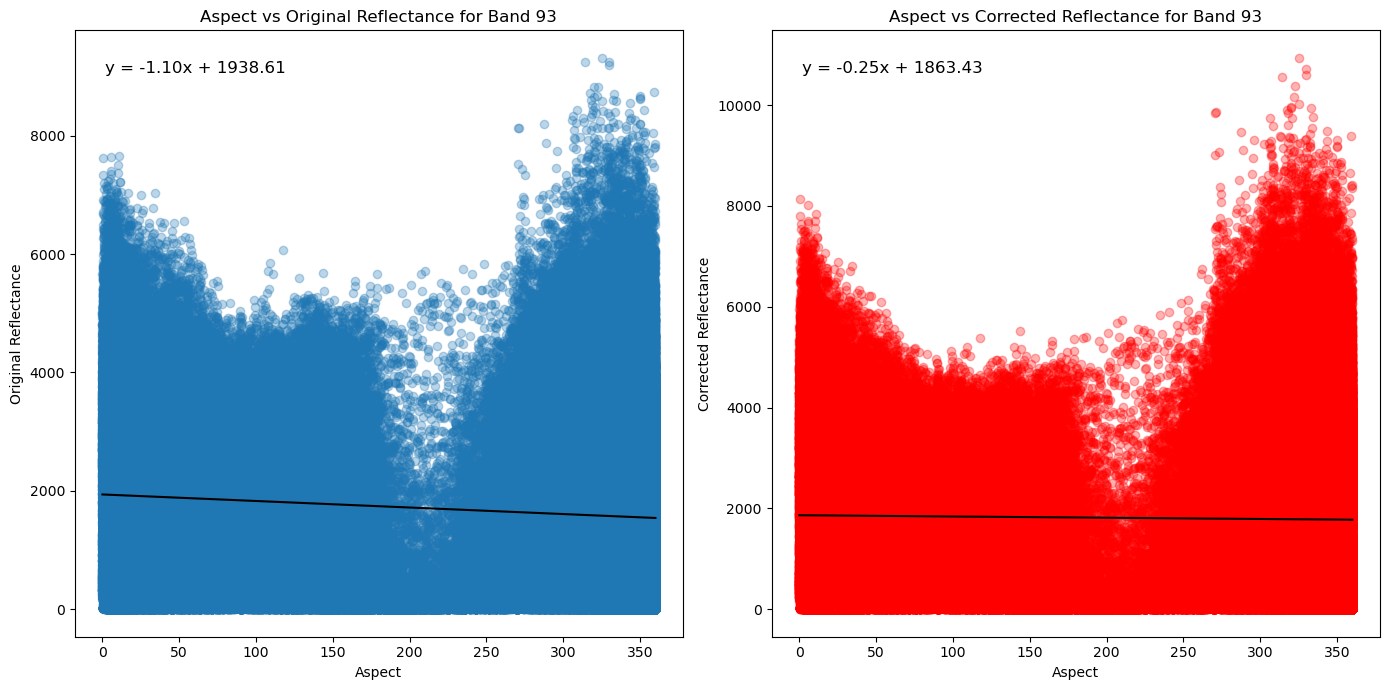

In [52]:
plot_relationship_with_reflectance(aspect, 'Aspect', reflectance, corrected_reflectance, band_index)

C:\Users\JANUSHI SHASTRI\AppData\Local\Temp\ipykernel_16152\2947291777.py:17: RankWarning: Polyfit may be poorly conditioned
  m_orig, b_orig = np.polyfit(param_flat, reflectance_band, 1)
C:\Users\JANUSHI SHASTRI\AppData\Local\Temp\ipykernel_16152\2947291777.py:37: RankWarning: Polyfit may be poorly conditioned
  m_corr, b_corr = np.polyfit(param_flat, corrected_reflectance_band, 1)


Correlation coefficient for original reflectance: -0.03798448468599098
Correlation coefficient for corrected reflectance: -0.15364409749847338


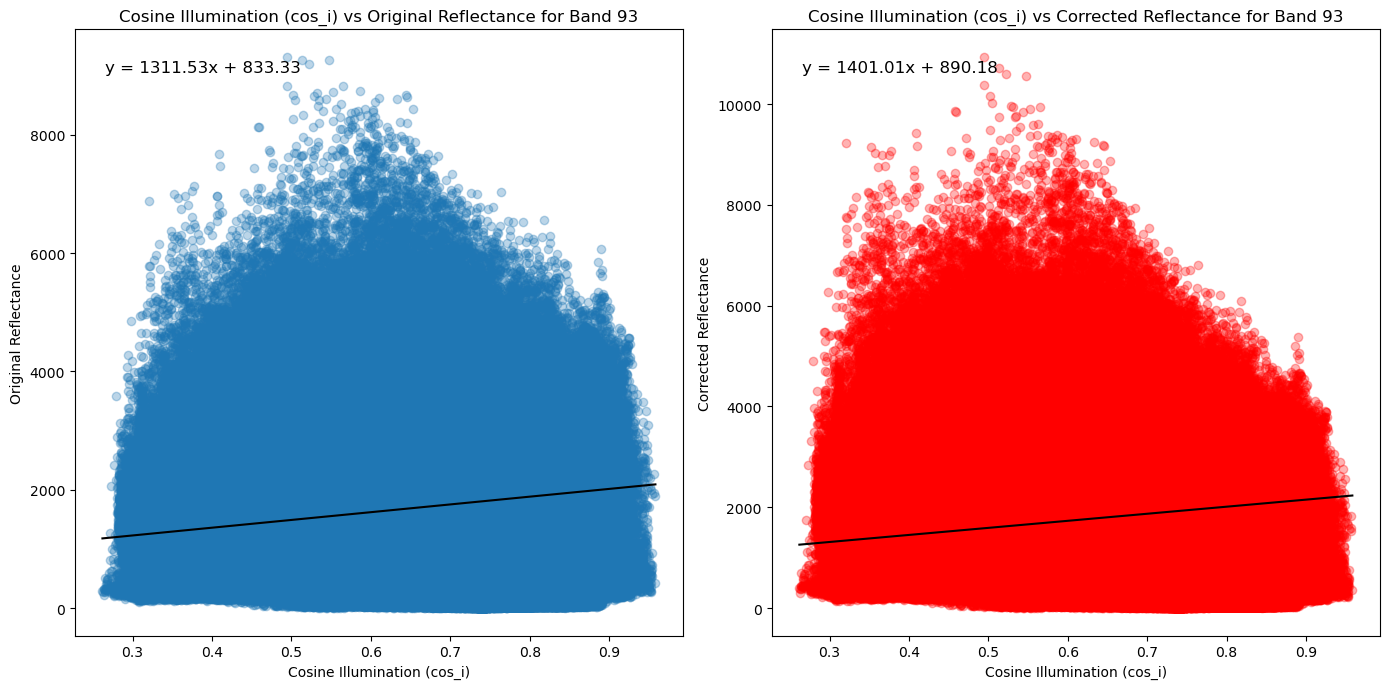

In [53]:
plot_relationship_with_reflectance(cos_i, 'Cosine Illumination (cos_i)', reflectance, corrected_reflectance, band_index)


### statistical analysis on the pixel values before and after correction

In [14]:
# Calculating statistics for the original image
mean_original = np.mean(reflectance)
median_original = np.median(reflectance)
std_dev_original = np.std(reflectance)

# Calculating statistics for the corrected image
mean_corrected = np.mean(corrected_reflectance)
median_corrected = np.median(corrected_reflectance)
std_dev_corrected = np.std(corrected_reflectance)

# Printing the results
print("Original Image Statistics:")
print(f"Mean: {mean_original}, Median: {median_original}, Standard Deviation: {std_dev_original}")

print("\nCorrected Image Statistics:")
print(f"Mean: {mean_corrected}, Median: {median_corrected}, Standard Deviation: {std_dev_corrected}")

Original Image Statistics:
Mean: 999.6667883309859, Median: 455.0, Standard Deviation: 1197.1102940859582

Corrected Image Statistics:
Mean: 1092.5013664920239, Median: 486.3966979980469, Standard Deviation: 1326.1319850769025


### Corelation Analysis

In [13]:

from scipy.stats import pearsonr
correlation_coeffs = np.zeros(reflectance.shape[-1])

# Calculating the correlation for each band
for i in range(reflectance.shape[-1]):
    original_band_flat = reflectance[..., i].flatten()
    corrected_band_flat = corrected_reflectance[..., i].flatten()
    correlation, _ = pearsonr(original_band_flat, corrected_band_flat)
    correlation_coeffs[i] = correlation

print(correlation_coeffs)

[0.99535523 0.99175742 0.99221532 0.99252893 0.99304065 0.99324001
 0.99329215 0.9934345  0.99349589 0.993555   0.99357444 0.99370943
 0.99381563 0.99393    0.99406175 0.99415458 0.9942498  0.99433049
 0.99439649 0.99445513 0.99451597 0.99457374 0.99462104 0.9946286
 0.99457878 0.99449869 0.99434399 0.99410161 0.99382203 0.9935214
 0.99327283 0.99310377 0.99299004 0.99292107 0.99287763 0.99290353
 0.99301521 0.99318629 0.99337705 0.9935527  0.99368679 0.99379033
 0.99386741 0.99390707 0.99393644 0.99398843 0.99405709 0.99411773
 0.9941553  0.99415323 0.99415085 0.99417962 0.99424048 0.99432015
 0.99437254 0.99442342 0.99450404 0.99455845 0.99451674 0.99459179
 0.99453711 0.99428197 0.99385285 0.99316985 0.99228208 0.99141993
 0.99069757 0.9901975  0.98982068 0.98963873 0.98959852 0.98963032
 0.98968943 0.98974488 0.98979524 0.98984944 0.98980938 0.98984051
 0.989821   0.98981095 0.98979983 0.98979259 0.98977781 0.98977098
 0.98975751 0.98976012 0.98975835 0.98974086 0.989749   0.989770

Looking at the values, they are all very close to 1, which suggests that there is a strong positive linear relationship between the original and corrected pixel values for each band. This means that, while the topographic correction may have changed the absolute values of the pixels, the relative relationships between pixel values are largely preserved after correction.

This is generally a good sign, as it suggests that the topographic correction has not introduced any major distortions or biases into the data. 

### NDVI

### Getting red and nir bands and wavelenghts

In [54]:

# Define the wavelength ranges for the red and NIR bands
red_band_range = (600, 700)
nir_band_range = (700, 1300)

red_band_indices = []
nir_band_indices = []
red_band_wavelengths = []
nir_band_wavelengths = []

for i, wavelength in enumerate(wavelengths):
    if red_band_range[0] <= wavelength <= red_band_range[1]:
        red_band_indices.append(i)
        red_band_wavelengths.append(wavelength)

    if nir_band_range[0] <= wavelength <= nir_band_range[1]:
        nir_band_indices.append(i)
        nir_band_wavelengths.append(wavelength)

print("Red Band Indices:", red_band_indices)
print("Red Band Wavelengths:", red_band_wavelengths)


print("NIR Band Indices:", nir_band_indices)
print("NIR Band Wavelengths:", nir_band_wavelengths)


Red Band Indices: [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Red Band Wavelengths: [601.828, 606.8383, 611.8486, 616.8589, 621.8691, 626.8794, 631.8897, 636.9, 641.9103, 646.9205, 651.9308, 656.9411, 661.9514, 666.9616, 671.9719, 676.9822, 681.9925, 687.0028, 692.013, 697.0233]
NIR Band Indices: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
NIR Band Wavelengths: [702.0336, 707.0439, 712.0542, 717.0644, 722.0747, 727.085, 732.0953, 737.1055

### NDVI Correction after topographic correction

In [75]:
def calculate_ndvi(ref, red_band_index, nir_band_index):
    # Extract the red and NIR bands
    red_band = ref[:, :, red_band_index]
    nir_band = ref[:, :, nir_band_index]

     # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    #replacing bands other than threshold to nan
    ndvi = np.where(ndvi >= 0.5, ndvi, np.nan)
    return ndvi

#### chosoing nearest red and nir to 660 and 830 nm


In [76]:
red_band_index = 56
nir_band_index = 86

ndvi_corrected_reflectance= calculate_ndvi(corrected_reflectance, red_band_index, nir_band_index)


In [77]:
print('ndvi shape:',ndvi_corrected_reflectance.shape)

ndvi shape: (1000, 1000)


In [78]:
ndvi_corrected_reflectance

array([[0.72374362, 0.6645161 , 0.62765959, ..., 0.74863388, 0.72948604,
        0.78685387],
       [       nan,        nan,        nan, ..., 0.78088077, 0.6803653 ,
        0.68432203],
       [0.63091788, 0.58926491,        nan, ..., 0.77319587, 0.76349025,
        0.66683193],
       ...,
       [0.63612288, 0.57645764, 0.56347187, ..., 0.76537845, 0.57197452,
               nan],
       [0.70330901, 0.69277274, 0.68882759, ..., 0.69432602, 0.60680009,
               nan],
       [0.78924327, 0.75737703, 0.71173849, ..., 0.78109738, 0.78513267,
        0.69683482]])

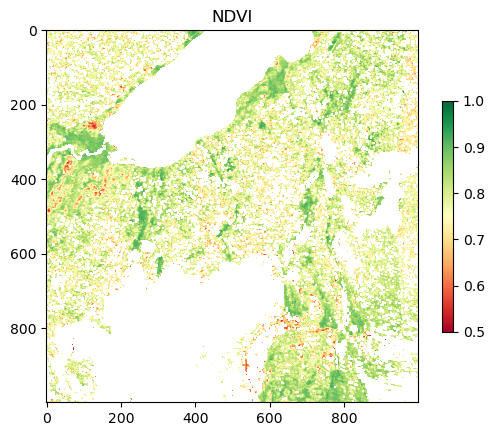

In [79]:
# Plot NDVI
plt.figure(figsize=(6, 6))
plt.imshow(ndvi_corrected_reflectance, cmap='RdYlGn')
plt.colorbar(shrink=0.5)
plt.title('NDVI')
plt.show()

### NDVI of Reflectance

In [80]:
red_band_index = 56
nir_band_index = 86

ndvi_reflectance= calculate_ndvi(reflectance, red_band_index, nir_band_index)

In [81]:
ndvi_reflectance

array([[0.72374361, 0.66451613, 0.62765957, ..., 0.74863388, 0.72948602,
        0.78685386],
       [       nan,        nan,        nan, ..., 0.78088077, 0.6803653 ,
        0.68432203],
       [0.63091787, 0.58926488,        nan, ..., 0.77319588, 0.76349024,
        0.66683193],
       ...,
       [0.63612288, 0.57645765, 0.56347187, ..., 0.76537846, 0.57197452,
               nan],
       [0.70330903, 0.69277274, 0.68882759, ..., 0.69432601, 0.60680011,
               nan],
       [0.78924328, 0.75737705, 0.71173848, ..., 0.78109739, 0.78513265,
        0.69683482]])

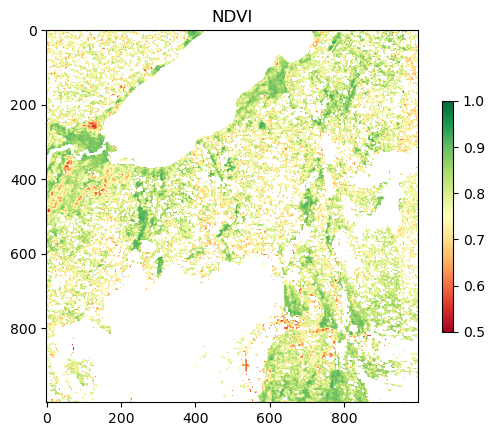

In [82]:
plt.figure(figsize=(6, 6))
plt.imshow(ndvi_reflectance, cmap='RdYlGn')
plt.colorbar(shrink=0.5)
plt.title('NDVI')
plt.show()

### Plottinf graphs to compare reflectance ndvi and after correction NDVI

In [83]:
def plot_ndvi_comparison(ndvi, corrected_ndvi):
    """
    Plots a comparison between original and corrected Normalized Difference Vegetation Index (NDVI) values.

    - ndvi: A 2D numpy array of the original NDVI.
    - corrected_ndvi: A 2D numpy array of the corrected NDVI.

    NDVI is a common index used in remote sensing to estimate vegetation health and coverage. 
    It ranges from -1 to 1, with higher values indicating denser or healthier vegetation.

    The function performs the following steps:
    1. Flattens both the original and corrected NDVI arrays into 1D arrays.
    2. Creates a plot showing both the original and corrected NDVI values.
    3. Uses a line plot for the original NDVI and a scatter plot for the corrected NDVI for visual distinction.
    4. Adds labels, title, and legend to the plot for clarity.
    5. Calculates and prints the correlation coefficient between the original and corrected NDVI values.

    This comparison is useful for analyzing the effect of the correction process on NDVI values and
    for quantitatively evaluating the degree of correlation between the original and corrected NDVI.
    """
    ndvi_flat = ndvi.flatten()
    corrected_ndvi_flat = corrected_ndvi.flatten()

    fig, ax = plt.subplots()

    ax.plot(ndvi_flat, label='Original NDVI')

    ax.scatter(range(len(corrected_ndvi_flat)), corrected_ndvi_flat, label='Corrected NDVI', color='red', alpha=0.5)

    ax.set_xlabel('Pixel Index')
    ax.set_ylabel('NDVI')
    ax.set_title('Comparison of Original and Corrected NDVI')

    ax.legend()

    mask = np.isfinite(ndvi_flat) & np.isfinite(corrected_ndvi_flat)
    correlation = np.corrcoef(ndvi_flat[mask], corrected_ndvi_flat[mask])[0, 1]

    print("Correlation coefficient:", correlation)

    plt.show()

Correlation coefficient: 0.9999999999999896


c:\Users\JANUSHI SHASTRI\anaconda3\envs\cires-demo\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


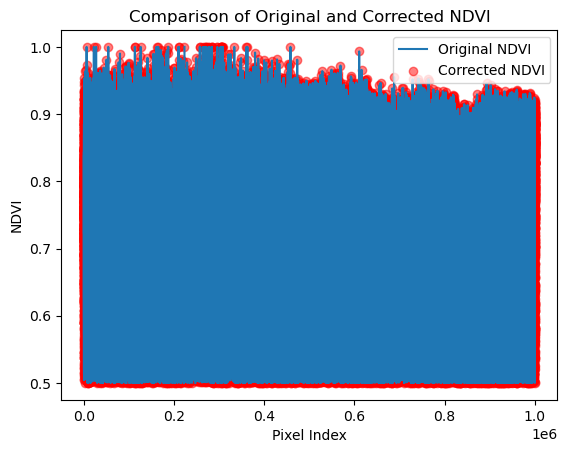

In [84]:
plot_ndvi_comparison(ndvi_reflectance, ndvi_corrected_reflectance)


In [85]:
def plot_correlation_2(x, y1, y2, x_label, y1_label, y2_label, title):
    # Create masks for finite (non-NaN) values
    mask_y1 = np.isfinite(x) & np.isfinite(y1)
    mask_y2 = np.isfinite(x) & np.isfinite(y2)

    # Apply the masks and flatten the arrays for plotting
    x_flat_y1 = x.flatten()[mask_y1.flatten()]
    y1_flat = y1.flatten()[mask_y1.flatten()]
    x_flat_y2 = x.flatten()[mask_y2.flatten()]
    y2_flat = y2.flatten()[mask_y2.flatten()]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].scatter(x_flat_y1, y1_flat, s=1, color="#0D52BD", alpha=0.5)
    m1, b1 = np.polyfit(x_flat_y1, y1_flat, 1)
    axs[0].plot(x_flat_y1, m1*x_flat_y1 + b1, color='red', linewidth=2)
    axs[0].text(0.05, 0.95, f'y = {m1:.2f}x + {b1:.2f}', transform=axs[0].transAxes, fontsize=12,
            verticalalignment='top')
    axs[0].set_title(f'Correlation between {x_label} and {y1_label}')
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel(y1_label)

    axs[1].scatter(x_flat_y2, y2_flat, s=1, color="#0D52BD", alpha=0.5)
    m2, b2 = np.polyfit(x_flat_y2, y2_flat, 1)
    axs[1].plot(x_flat_y2, m2*x_flat_y2 + b2, color='red', linewidth=2)
    axs[1].text(0.05, 0.95, f'y = {m2:.2f}x + {b2:.2f}', transform=axs[1].transAxes, fontsize=12,
            verticalalignment='top')
    axs[1].set_title(f'Correlation between {x_label} and {y2_label}')
    axs[1].set_xlabel(x_label)
    axs[1].set_ylabel(y2_label)

    plt.tight_layout()
    plt.show()


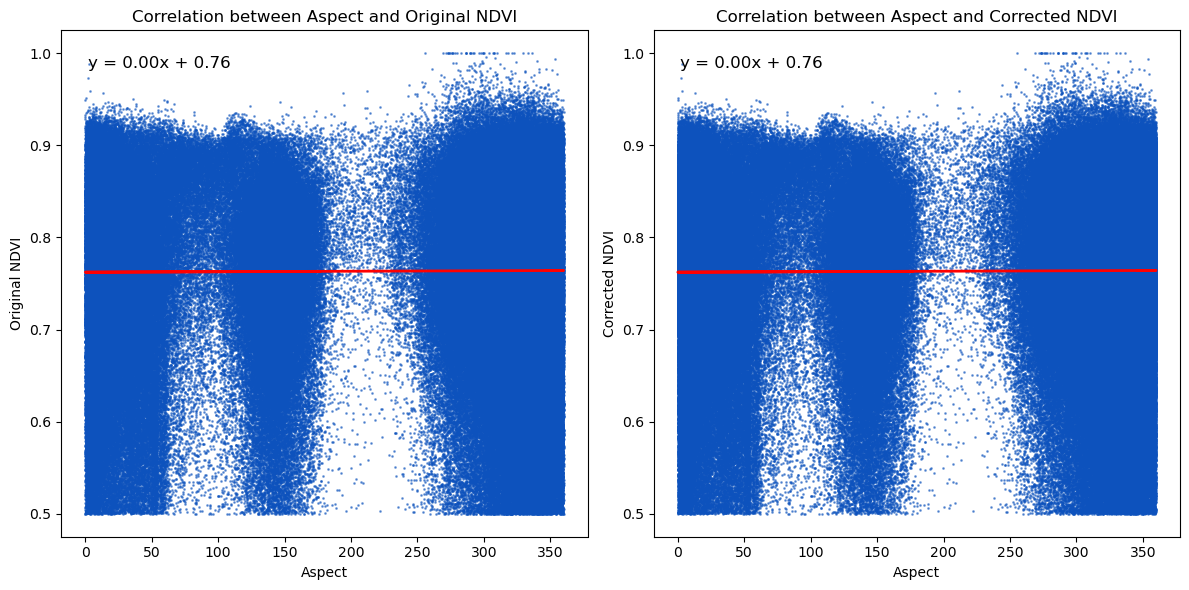

In [74]:
plot_correlation_2(aspect, ndvi_reflectance, ndvi_corrected_reflectance, 'Aspect', 'Original NDVI', 'Corrected NDVI', 'Correlation between Aspect and NDVI')


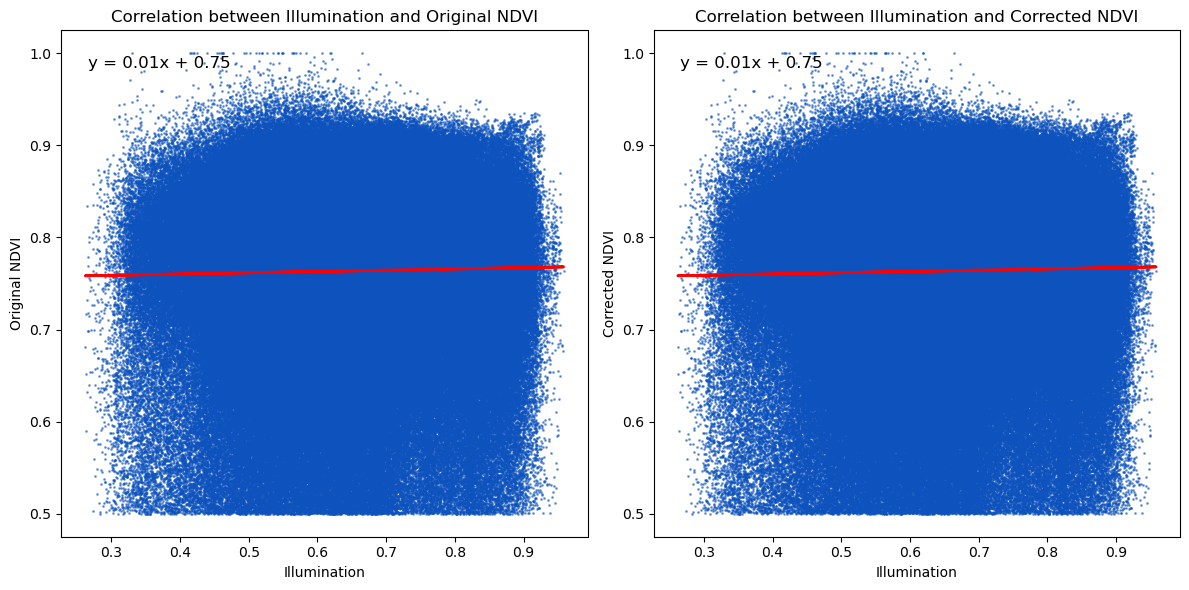

In [87]:
plot_correlation_2(cos_i, ndvi_reflectance, ndvi_corrected_reflectance, 'Illumination', 'Original NDVI', 'Corrected NDVI', 'Correlation between Illumination and NDVI')
